# Analyze growth rates

In [10]:
import coralme
import pickle
import pandas
import os
import tqdm
import numpy
import json
pandas.set_option('display.max_colwidth', None)
from coralme.builder.helper_functions import *
import matplotlib.pyplot as plt

## Analyze

In [11]:
with open('names.json') as f:
    names = json.load(f)

### Load

In [12]:
results_dict = {}
directory = "./analysis/10steps/"
for file in os.listdir(directory):
    if ".csv" not in file: continue
    results_dict[file.split("_C_")[0]] = pandas.read_csv(directory + file,index_col=0)

results_dict = {names[k]:v for k,v in results_dict.items()}

### Plot

In [13]:
import pandas
import os

In [14]:
sensitivity = {}
for org,df in results_dict.items():
    sensitivity[org] = df.loc['biomass_dilution'].to_dict()
sensitivity_df = pandas.DataFrame.from_dict(sensitivity).dropna()
df = (sensitivity_df)
df = df.div(df.max())

In [16]:
import seaborn as sns
plt.rcParams['svg.fonttype'] = 'none'

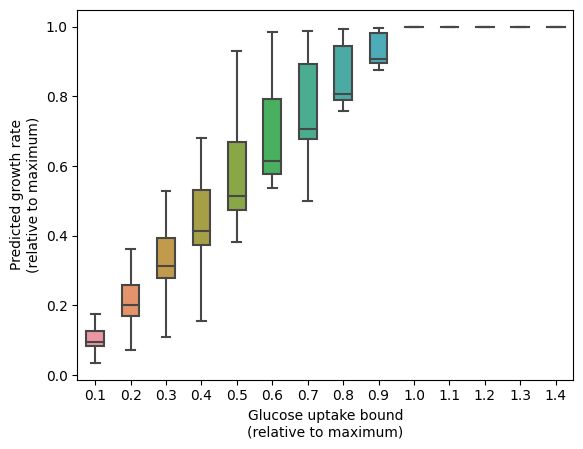

In [17]:
fig,ax = plt.subplots()
# ax.plot(df.index,df.mean(axis=1), '-.')
for pos,row in df.iterrows():
    Y = numpy.random.normal(0., 0.04, size = len(row.values))
#     for i,y in zip(row.values,Y):
#         ax.plot(y+int(pos),i,'o',color='k',alpha=0.4,markersize=3)
sns.boxplot(data=df.T,ax=ax,width=0.5,showfliers=False)

ax.set_xlabel("Growth point")
ax.set_ylabel("Growth rate (% of maximum)")

ax.set_xlabel("Glucose uptake bound\n(relative to maximum)")
ax.set_ylabel("Predicted growth rate\n(relative to maximum)")
ax.set_xticklabels(["{:.1f}".format(i) for i in numpy.arange(0.1,1.5,0.1)])

plt.savefig("./figures/growth_rates.svg",format="SVG")